# 金貨20枚
# 体積と重さをはかる
# 金貨と真鍮を見分ける

# データ読み込み

In [69]:
import numpy as np
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

auth = np.genfromtxt('CodeIQ_auth.txt', delimiter=' ')
#print(auth)

# 教師データ
train_X = np.array([[x[0], x[1]] for x in auth])
# 教師データのラベル
labels = [int(x[2]) for x in auth]

# テストデータ
test_X = np.genfromtxt('CodeIQ_mycoins.txt', delimiter=' ')
#print(test_X.T[0])

# データ可視化

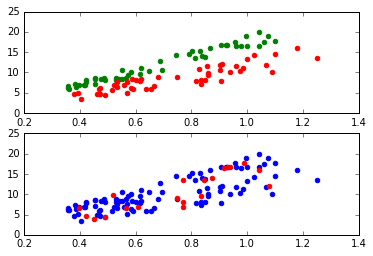

In [29]:
%matplotlib inline 
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# 教師データから正解を抽出
correct = np.array([[x[0], x[1]] for x in auth if x[2] == 1]).T
# 同じくニセモノを抽出
wrong   = np.array([[x[0], x[1]] for x in auth if x[2] == 0]).T

# これらを散布図にプロッティングする
ax1.scatter(correct[0], correct[1], color='g')
ax1.scatter(wrong[0],   wrong[1],   color='r')
ax2.scatter(train_X.T[0], train_X.T[1], color='b')
ax2.scatter(test_X.T[0],  test_X.T[1],  color='r')

#plt.legend(loc='best')
plt.show()
#plt.savefig("image.png")

* 上図の緑が正解、赤がニセモノの金貨です。
* 下図は真贋データ (青) に対する、手に入れた金貨 (赤) の分布となります。

# 解法

* 線形分離問題なので LinearSVC を使います。

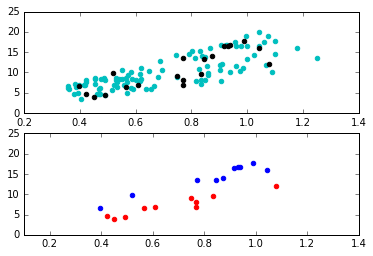

In [67]:
clf = LinearSVC(C=1)

# 訓練
clf.fit(train_X, labels)
# 分類
results = clf.predict(test_X)
#for result, feature in zip(results, test_X):
#    print(result, feature)

#プロット
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# 結果から正解を抽出
correct=np.array([[feature[0], feature[1]] for (result, feature) in zip(results, test_X) if result == 1]).T
# 結果から不正解を抽出
wrong=np.array([[feature[0], feature[1]] for (result, feature) in zip(results, test_X) if result == 0]).T


# これらを散布図にプロッティングする
ax1.scatter(train_X.T[0], train_X.T[1], color='c')      #データ群
ax1.scatter(test_X.T[0],  test_X.T[1],  color='k')      #手に入れたコイン
ax2.scatter(wrong[0],  wrong[1],  color='r')               #不正解
ax2.scatter(correct[0],  correct[1],  color='b')           #正解

plt.xlim(0.1,1.4)
plt.ylim(0,25)
plt.show()
#plt.savefig("image.png")